<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-580915-1694672131/blob/main/Assignment_3__Data_Preprocessing_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P J N D M PRAKASH

durga.21bce8942@vitapstudent.ac.in

VIT-AP  MORNING SLOT

ASSIGNMENT - 3

DATA PREPROCESSING ON TITANIC DATASET

In [ ]:
#	Data Preprocessing.
# Import the Libraries.
# Import the dataset
# Checking for Null Values.

# Data Visualization.
# Outlier Detection
#	Splitting Dependent and Independent variables
#	Encoding
#	Feature Scaling.
#	Splitting Data into Train and Test.

Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("tested.csv")

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [8]:
df.corr().Survived.sort_values(ascending=False)

<ipython-input-8-fe51b8bb09d5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Survived.sort_values(ascending=False)


Survived       1.000000
Fare           0.191514
Parch          0.159120
SibSp          0.099943
Age           -0.000013
PassengerId   -0.023245
Pclass        -0.108615
Name: Survived, dtype: float64

Handling missing values

In [9]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [11]:
sum(df.Age.isnull())

86

In [12]:
sum(df.Fare.isnull())

1

In [13]:
sum(df.Cabin.isnull())

327

In [14]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [15]:
df["Fare"].fillna(df["Fare"].mode()[0],inplace=True)

Data - Visualzation

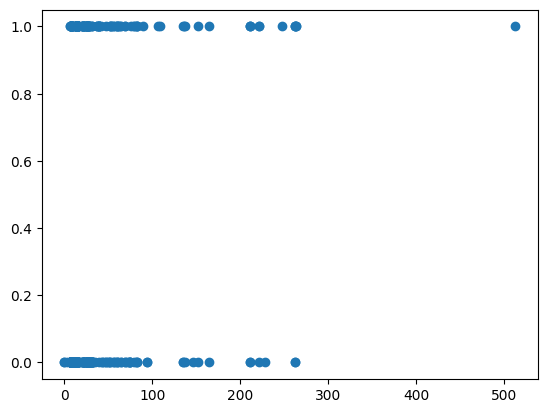

In [20]:
plt.scatter(df['Fare'],df['Survived'])

<ipython-input-21-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

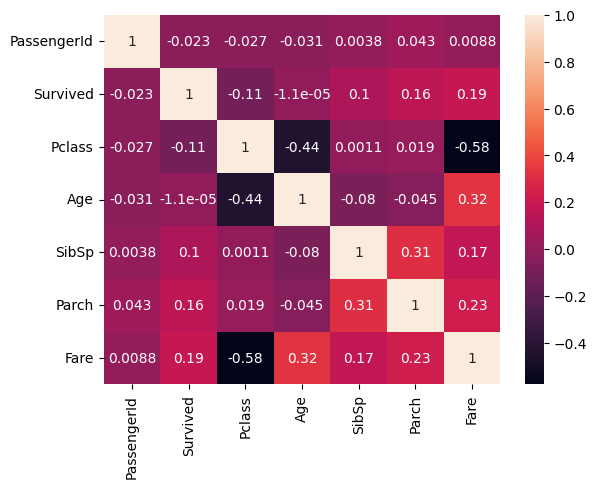

In [21]:
sns.heatmap(df.corr(),annot=True)

<Figure size 2000x1500 with 0 Axes>

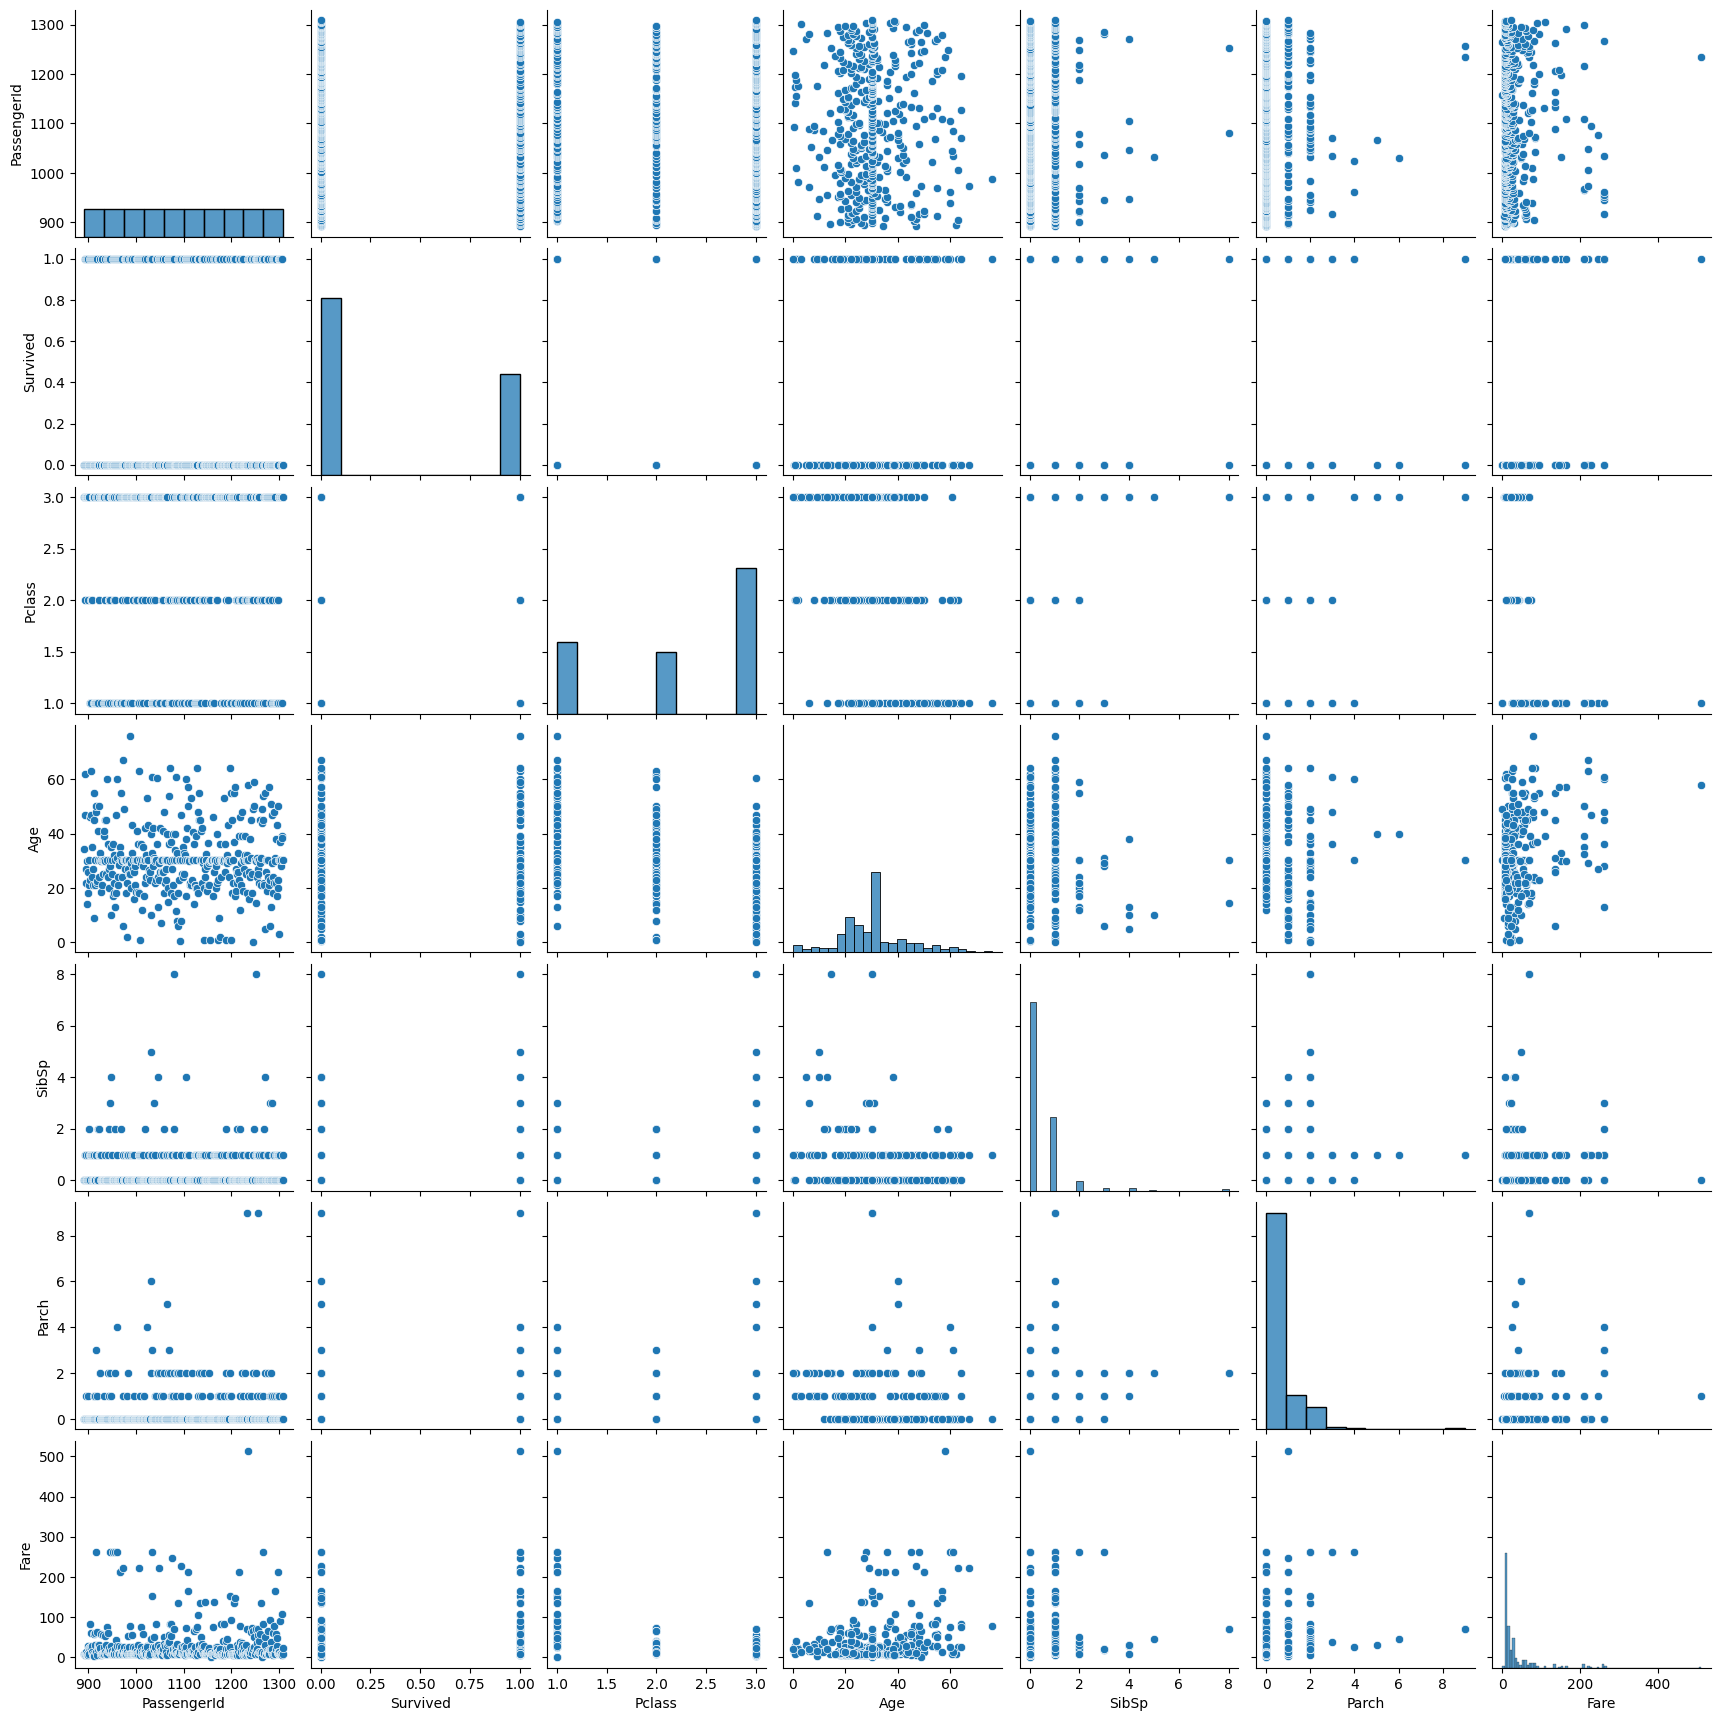

In [25]:
plt.figure(figsize=(20,15))
sns.pairplot(df)

<ipython-input-33-b5d9aff878fc>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(x='Embarked',y='Survived',data=df,ci=0)


<Axes: xlabel='Embarked', ylabel='Survived'>

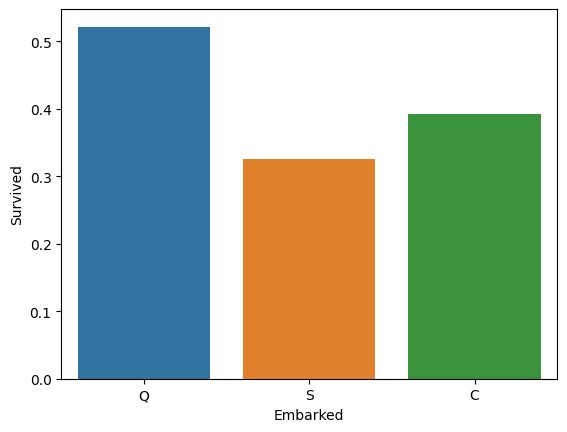

In [33]:
sns.barplot(x='Embarked',y='Survived',data=df,ci=0)

Outlier Detection

<Axes: >

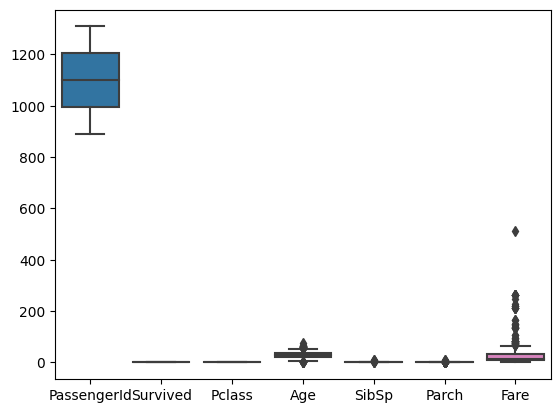

In [34]:
sns.boxplot(df)

<Axes: >

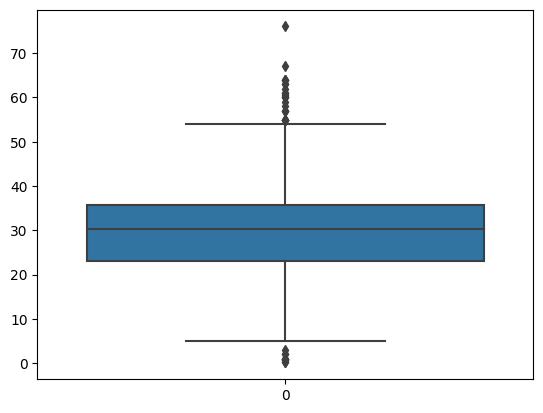

In [35]:
sns.boxplot(df.Age)

In [39]:
df.median()

<ipython-input-39-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


PassengerId    1098.50000
Survived          0.00000
Pclass            3.00000
Age              30.27259
SibSp             0.00000
Parch             0.00000
Fare             13.50000
dtype: float64

In [45]:
q1= df.Age.quantile(0.25)
q3= df.Age.quantile(0.75)

iqr = q3-q1
upperlimit = q3 + 1.5*iqr
lowerlimit = q1 - 1.5*iqr

df["Age"]=np.where(df["Age"] > upperlimit,30.27,df["Age"])  # Replace outlier values with median

<ipython-input-45-2f1cc8a9a168>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"]=np.where(df["Age"] > upperlimit,30.27,df["Age"])  # Replace outlier values with median


<Axes: >

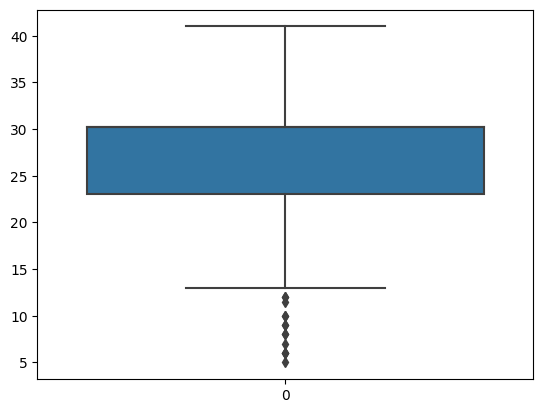

In [46]:
sns.boxplot(df.Age)

<Axes: >

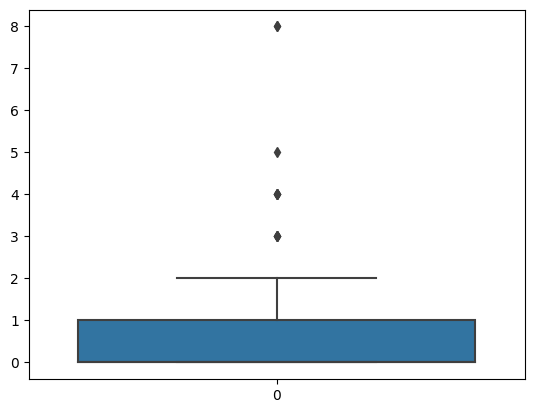

In [48]:
sns.boxplot(df.SibSp)

In [49]:
p99 = df.SibSp.quantile(0.99)

In [50]:
df=df[df.SibSp < p99]

<Axes: >

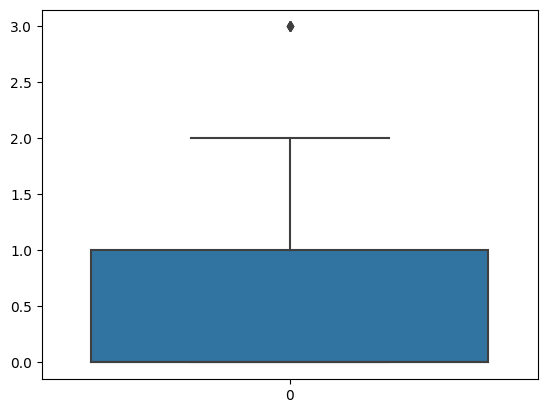

In [51]:
sns.boxplot(df.SibSp)

<Axes: >

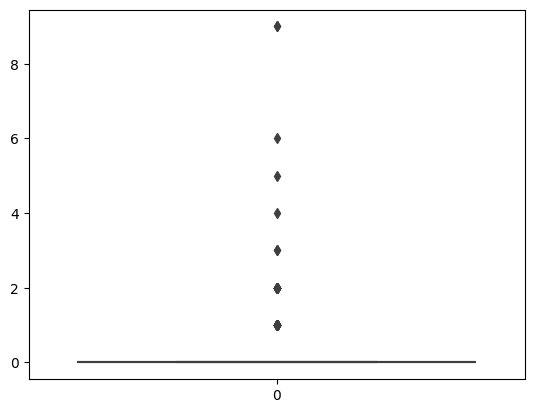

In [52]:
sns.boxplot(df.Parch)

In [54]:
p99 = df.Parch.quantile(0.99)

In [55]:
df=df[df.Parch<p99]

<Axes: >

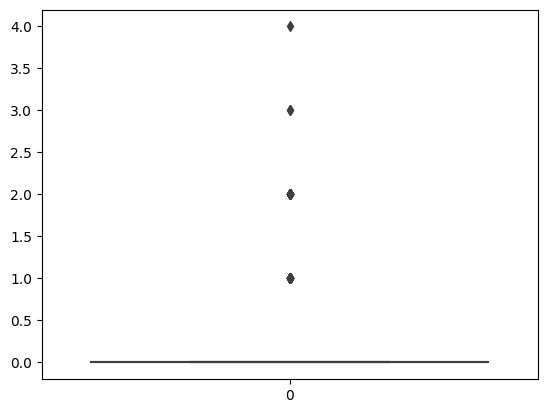

In [56]:
sns.boxplot(df['Parch'])

<Axes: >

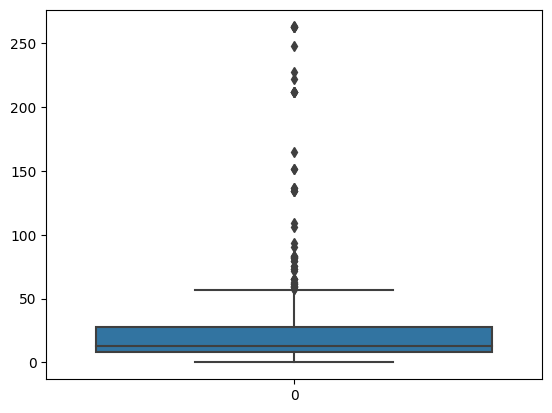

In [57]:
sns.boxplot(df['Fare'])

In [59]:
q1= df.Fare.quantile(0.25)
q3= df.Fare.quantile(0.75)

iqr = q3-q1
upperlimit = q3 + 1.5*iqr
lowerlimit = q1 - 1.5*iqr

df['Fare']=np.where(df["Fare"] > upperlimit,13.50,df["Fare"])

<Axes: >

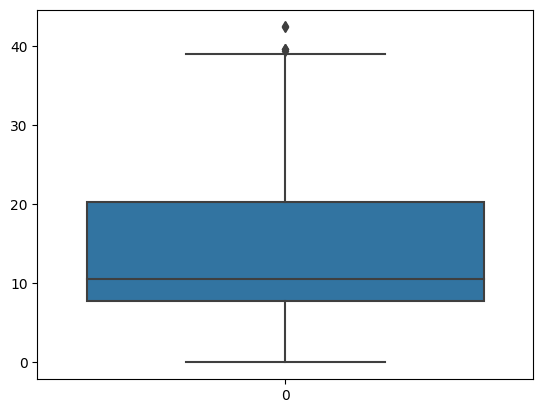

In [60]:
sns.boxplot(df.Fare)

Spliting Dependent and Independent Variables

In [61]:
x = df.drop(columns=["Survived","PassengerId","Name","Ticket","Cabin"],axis=1)

In [62]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50,0,0,7.8292,Q
1,3,female,30.27,1,0,7.0000,S
3,3,male,27.00,0,0,8.6625,S
4,3,female,22.00,1,1,12.2875,S
5,3,male,14.00,0,0,9.2250,S


In [63]:
y = pd.Series(df["Survived"])

In [65]:
y.head()

0    0
1    1
3    0
4    1
5    0
Name: Survived, dtype: int64

Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
x["Sex"] = le.fit_transform(x["Sex"])

In [68]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50,0,0,7.8292,Q
1,3,0,30.27,1,0,7.0000,S
3,3,1,27.00,0,0,8.6625,S
4,3,0,22.00,1,1,12.2875,S
5,3,1,14.00,0,0,9.2250,S


In [69]:
print(le.classes_)

['female' 'male']


In [70]:
mapping=dict(zip(le.classes_,range(len(le.classes_))))

In [71]:
mapping

{'female': 0, 'male': 1}

In [72]:
le1 = LabelEncoder()

In [73]:
x["Embarked"] = le1.fit_transform(x["Embarked"])
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50,0,0,7.8292,1
1,3,0,30.27,1,0,7.0000,2
3,3,1,27.00,0,0,8.6625,2
4,3,0,22.00,1,1,12.2875,2
5,3,1,14.00,0,0,9.2250,2


In [74]:
print(le1.classes_)

['C' 'Q' 'S']


In [77]:
mapping1=dict(zip(le1.classes_,range(len(le1.classes_))))
mapping1

{'C': 0, 'Q': 1, 'S': 2}

Feature - Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [79]:
x_Scaled = pd.DataFrame(ms.fit_transform(x),columns = x.columns)

In [80]:
x_Scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.814286,0.000000,0.00,0.184216,0.5
1,1.0,0.0,0.693429,0.333333,0.00,0.164706,1.0
2,1.0,1.0,0.600000,0.000000,0.00,0.203824,1.0
3,1.0,0.0,0.457143,0.333333,0.25,0.289118,1.0
4,1.0,1.0,0.228571,0.000000,0.00,0.217059,1.0


Splitting , Training and Testing Data

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x_Scaled,y,test_size = 0.2,random_state =0)

In [83]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(256, 7) (64, 7) (256,) (64,)


                                           **THE  END**             